<a href="https://colab.research.google.com/github/jaikishanjayakumar/MachineIntelligenceandBrainResearch/blob/main/Biological_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1-HwoOx645-DW51QsJLKE1FzvIXVyKQqj)

#Machine Intelligence and Brain Research
*Center for Computational Brain Research, Indian institute of Technology Madras*

# Week 4: Tutorial on Biological Vision


Welcome to the tutorial on Biological Vision. We hope that you have already watched the lectures from our international experts </p>


The lecture youtube links can be found below <p> [1. Prof Paul Martin on Early visual Pathways](https://youtu.be/v8M36yHGw6Q). <p> [2. Prof Jonathan Victor on Cortical Pathways of Vision](https://youtu.be/BwHIcJp5_Zc). <p>[3. Prof Trichur Vidyasagar on Vision Beyond the striate cortex](https://youtu.be/Ja0qjnZA8aU)


This tutorial will introduce you to the concept of receptive fields in vision, and introduce you to models of vision at the different stages of vision.

An important note: These models are approximate models and as you would have listened to in Prof Victor's lecture, these models are approximate, the brain, in reality, is a lot more complex and some of what happens in the visual system is still being studied.



## Introduction

We, humans, rely on our senses to make sense of the world. We are known as "visual" mammals and rely a lot on vision. As a consequence, a large part of our brains are devoted to processing Vision. Our visual system has a variety of neurons that detect form, color, motion and Depth perception. In this tutorial, we will look at how the cells in the eye and the Brain detect Form and Color.

##Recap 

From the Prof Martin's lectures, we recollect that the eye contains photoreceptors which convert Light energy into electrochemical impulses for the next stage. The vertical pathway consists of photoreceptors to Bipolar cells to Ganglion cells whose axons form the Optic nerve out of the eye to the brain.
<p> This pathway is <b> Excitatory </b>, which means that one step excites the other. The photoreceptor response will trigger Bipolar cells, these inturn will trigger ganglion cells and so on. Please note that these cells are connected by chemical synapses (gaps through which cells communicate chemically via a neurotransmitter) and the passage of information does not necessarily have to be 1:1. The cheif chemical transmitter for this exictatory pathway is <b>Glutamate</b> for this vertical pathway.

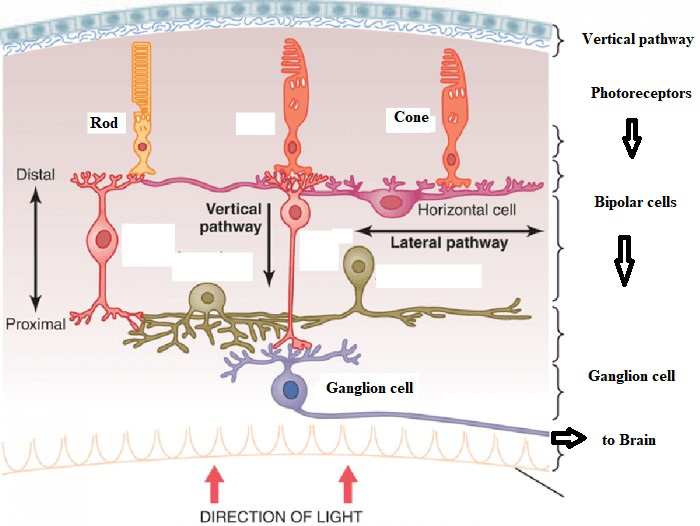

In [ ]:
#@title <p><b> Run the code for demonstration of the retinal pathway</b></p>
#CV2 library for images
import cv2 as cv
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image


urls=["https://raw.githubusercontent.com/jaikishanjayakumar/MachineIntelligenceandBrainResearch/e742e0954bad3b91f5fcd82e296e85a60d6ca41b/retinapathway.jpg"];
for url in urls:
  image = io.imread(url);
  retinapath = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2_imshow(retinapath)

  

Please also note there are lateral pathways which provide <b>inhibition</b>, i.e. suppresses the synaptic transfer. In simple words, these can be thought of as providing gate-like features for information transmission (subtraction or division).

# Stages in the Early visual pathway
Visual information that reaches the eye stimulates the <b>photoreceptors </b> which passes this information out to the Bipolar cells which then pass this information to the <b>ganglion cells </b>.

Axons of these ganglion cells form the optic nerve. These axons terminate at the main visual nucleus in the brain called as <b> dorsal lateral geniculate nucleus </b> or LGN or dLGN.

The cells from this nucleus are organized into three distinctive streams: Magnocellular, Parvocellular and Koniocellular pathways. Magnocellular generally is involved with the luminance stream and motion perception while the parvocellular can be generalized to the fine vision, color perception. Koniocellular layers function is a hot topic for research and some color functions like the Blue yellow color channel can be found within these layers.

Outputs from the LGN reaches the primary visual cortex, where different types of neurons are found. The two major types we will discuss in this tutorial are the <b> Simple cells </b> and the <b> Complex cells </b>.

# Structure of this tutorial
We are going to approximate what happens to visual signal during the different stages of the visual pathway by

1. Defining input images
    <ul> A simple bar </ul>
    <ul> A example image of a city landscape </ul>

2.  An approximation of the process level (involving a receptive field matrix and a filter)

We will convolve the two to present examples that mimic some of the functions of the early visual pathway

We will learn about what happens at
1. Simple blur filter (Early retinal level)
2. Retinal Ganglion/ LGN stage
3. Simple cell stage of the visual cortex
4. Complex cell stage of the visual cortex


Please note these are approximations, there are much complex visual phenomenon associated with these cells at each stage and explaning all of those is beyond the scope of this tutorial.

## Dependencies

The following are python dependencies which we will use for this lesson are all imported below

In [ ]:
# cv2 is the opencv library which has many useful functions that we will be using 
import cv2

# numpy is very useful for vectorized operations
import numpy as np
from numpy import zeros

# we use math for basic mathematical functions
import math

# we use matplotlib for visualizations and reading images
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# we use signal from scipy for convolutions
from scipy import signal

## Receptive fields
<p> Receptive fields are defined as delimited medium where some physiological stimuli can evoke a sensory neuronal response in specific organisms (Alonso and Chen, 2008, Scholarpedia). For visual system, this is volumes in visual space which a neuron is sensitive to. In our examples, since the image is a 2D image, we will define it as a area in visual space. </p>
<p> We will generate a function to apply the different filters for the different level, however, scipy's convolve function does not allow for function within a function. Hence, we will generate a field matrix and then define a function attributing a model to this matrix (receptive field) and apply this to our example images.


In [ ]:
# Generates filter matrix given func(x,y)
def filterMatrix(func):
    h = 30
    g = zeros((h,h))
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-h/2
            y = yi-h/2
            g[xi, yi] = func(x,y)
    return g

In [ ]:
# Converts coloured images to gray scale
def rgb2gray(rgb_img):
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

## Input images
We are going to use gray scale images for ease of explanation (avoiding the color channels and working with intensities). We will be working with two images.
1. A white bar on a grey Background
2. A picture of a cityscape (Picture of New York Empire State Buiding courtesy Bruce Friedman)


### Reading The Image

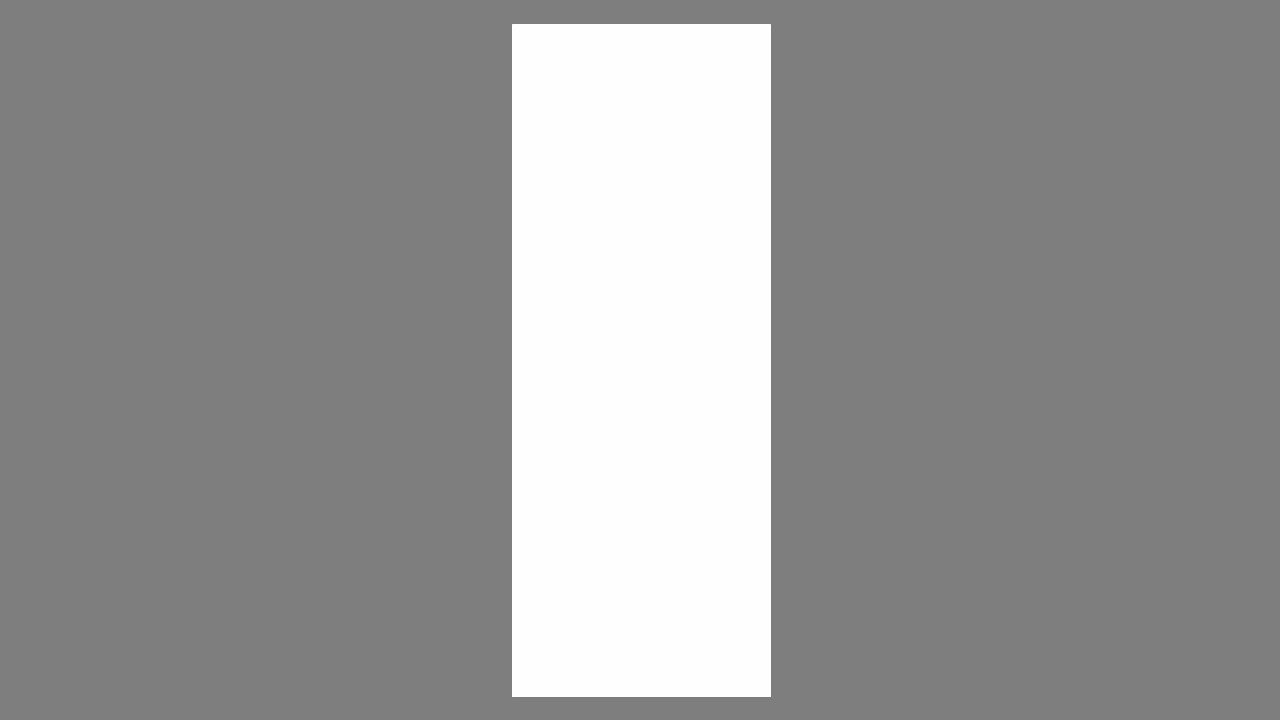

In [ ]:
#@title White Bar on a gray Background
# bar on gray background
urls=["https://raw.githubusercontent.com/jaikishanjayakumar/MachineIntelligenceandBrainResearch/Figures/WhiteBar.jpg"];
for url in urls:
  bar = io.imread(url);
  bar = cv.cvtColor(bar, cv.COLOR_BGR2RGB)
  barimg=rgb2gray(bar)
  cv2_imshow(barimg)

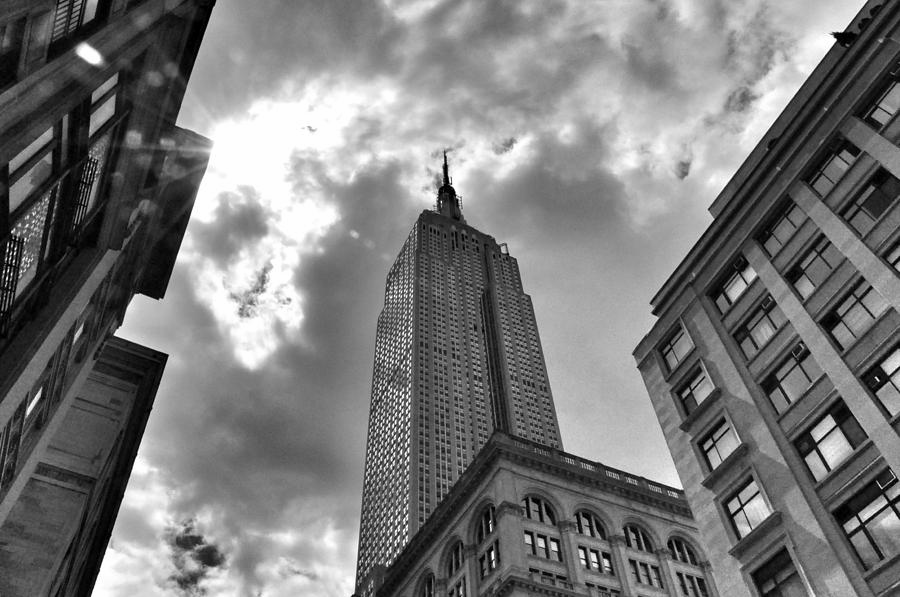

In [ ]:
#@title Empire state Building 
# image with many edges and orientations
urls=["https://raw.githubusercontent.com/jaikishanjayakumar/MachineIntelligenceandBrainResearch/Figures/empire-state-building-bw-new-york-city-bruce-friedman.jpg"];
for url in urls:
  nyc = io.imread(url);
  nyc = cv.cvtColor(nyc, cv.COLOR_BGR2RGB)
  nycimg=rgb2gray(nyc)
  cv2_imshow(nycimg)
  

### Starting with a simple example (Blurring filter)



#### Filter architecture
We will define our first stage as a simple blurring filter, which is basically a circular symmetric 2D gaussian filter. Biologically we can define this as a central pixel getting the maximum excitation with the neighbouring pixels in convolution.

In Fourier space, this blurring filter is simply a low pass filter cutting off the high frequency information. 

<p> Lets see what this filter looks like with our receptive field matrix

In [ ]:
# 2D Gaussian function
def gaussian2D(x, y, sigma):
    return (1.0/(2*math.pi*(sigma**2)))*math.exp(-(1.0/(2*(sigma**2)))*(x**2 + y**2))

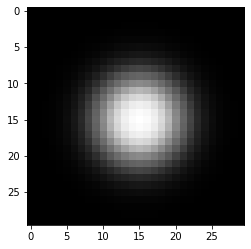

In [ ]:
# Plotting the 2D Gaussian filter
receptiveFieldMatrix = filterMatrix(lambda x,y:gaussian2D(x,y,4))
plt.imshow(receptiveFieldMatrix, cmap=cm.Greys_r)

####Applying this filter to the bar image
(Note the blurred edges compared with the original image)

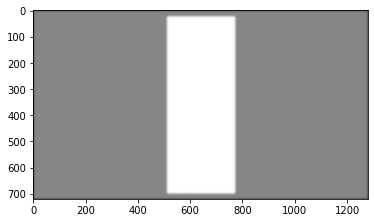

In [ ]:
# Convolving the filter with the image
Filteraply = signal.convolve(barimg,receptiveFieldMatrix, mode='same')
plt.imshow(Filteraply, cmap=cm.Greys_r)

####Applying this filter to the cityscape image

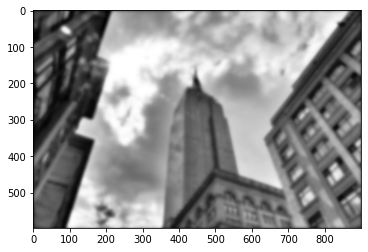

In [ ]:
# Convolving the filter with the image
Filteraply = signal.convolve(nycimg,receptiveFieldMatrix, mode='same')
plt.imshow(Filteraply, cmap=cm.Greys_r)

###Retinal ganglion cells/ LGN cells 


####Filter Architecture
<p> Retinal ganglion cells have a receptive field structure that can be approximated to a difference of gaussian (DoG) or a mexican hat profile. They can be a ON center- surrounded by OFF field (our example) or the reverse OFF center surrounded by ON field. These types of receptive fields are found when recording from the ganglion cells within the retina of the eye as well as the neurons of the lateral geniculate nucleus. </p>

These types of receptive fields highlight the contrast between light and dark in the image.
Note: These receptive field profiles are assumed in our model to be symmetrically circular but in reality there are small orientation biases.

In [ ]:
# function to generate mexican hat profile matrix
def generateMexicanHatProfileMatrix(sigma2,sigma1):
  # sigma2 > sigma1 for ON center OFF surround and sigma1>sigma2 for OFF center
  gaussianMatrix1 = filterMatrix(lambda x,y: gaussian2D(x,y,sigma1))
  gaussianMatrix2 = filterMatrix(lambda x,y: gaussian2D(x,y,sigma2))
  return np.subtract(gaussianMatrix1,gaussianMatrix2)

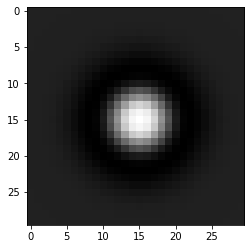

In [ ]:
# plotting mexican hat profile filter
mexicanHatProfileMatrix = generateMexicanHatProfileMatrix(4,3)
plt.imshow(mexicanHatProfileMatrix, cmap=cm.Greys_r)

#### Applying this profile onto bar image 
(Note the highlighted areas where there is a change from light to dark or vice versa)

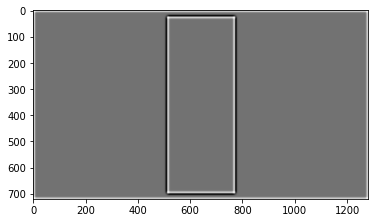

In [ ]:
# convolving barimage with mexican hat profile filter
mexicanHatProfileConvolution = signal.convolve(barimg,mexicanHatProfileMatrix, mode='same')
plt.imshow(mexicanHatProfileConvolution, cmap=cm.Greys_r)

#### Applying this profile to cityscape image

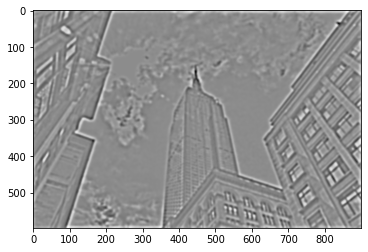

In [ ]:
# convolving nycimage with mexican hat profile filter
mexicanHatProfileConvolution1 = signal.convolve(nycimg,mexicanHatProfileMatrix, mode='same')
plt.imshow(mexicanHatProfileConvolution1, cmap=cm.Greys_r)

####Observations

This filter appears to be highliting changes from light to dark or dark to light. In other words it is sensitive to changes in luminance contrast, which is a feature of retinal ganglion cells and the cells of the Lateral geniculate nucleus.

### Primary Visual cortical neurons

The receptive fields profiles that we were looking at in the retina were symmetric and circular receptive field profile (or in reality with slight biases in orientation). This changes dramatically when the visual signals reaches the <b>primary visual cortex</b> or V1 or Area 17. The receptive fields become sensitive to the orientation of the stimulus i.e. Single neurons only respond to specific orientations alone. There are differnt types of neuronal responses in this area. We are going to consider two major type of responses:</p> <p><b> Simple cells </b> are called simple because they have distinct regions of ON and OFF responsive areas.</p>
<p> In our example, we are going to use a profile called a Gabor patch or a Gabor function to model simple cell responses. Gabor patches also contain orientation information. Also note we are going to use two different types of Gabor, the odd Gabor function and Even Gabor function, the difference as you would notice is in the positions of the Dark and Light Patches</p>

####Filter architecture for Gabor functions

In [ ]:
# odd and even Gabor functions
def oddGabor2D(x,y,sigma,orientation):
    return math.sin(x + orientation*y) * math.exp(-(x**2 + y**2)/(2*sigma))

def evenGabor2D(x,y,sigma,orientation):
    return math.cos(x + orientation*y) * math.exp(-(x**2 + y**2)/(2*sigma))

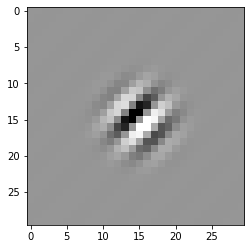

In [ ]:
# plotting odd Gabor function
oddGaborMatrix = filterMatrix(lambda x,y: oddGabor2D(x,y,7,1))
plt.imshow(oddGaborMatrix, cmap=cm.Greys_r)

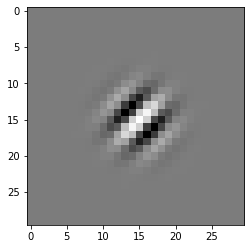

In [ ]:
# plotting even Gabor function
evenGaborMatrix = filterMatrix(lambda x,y: evenGabor2D(x,y,7,1))
plt.imshow(evenGaborMatrix, cmap=cm.Greys_r)

#### Applying this profile to the example images

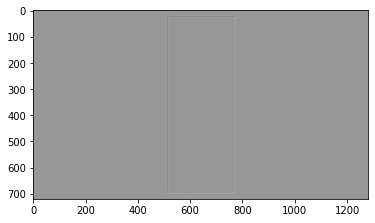

In [ ]:
# convolving image with odd Gabor function
oddGaborConvolution = signal.convolve(barimg,oddGaborMatrix, mode='same')
plt.imshow(oddGaborConvolution, cmap=cm.Greys_r)

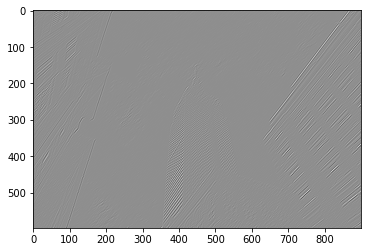

In [ ]:
# convolving image with odd Gabor function
oddGaborConvolution1 = signal.convolve(nycimg,oddGaborMatrix, mode='same')
plt.imshow(oddGaborConvolution1, cmap=cm.Greys_r)

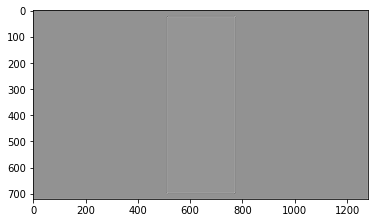

In [ ]:
# convolving image with even Gabor function
evenGaborConvolution = signal.convolve(barimg,evenGaborMatrix, mode='same')
plt.imshow(evenGaborConvolution, cmap=cm.Greys_r)

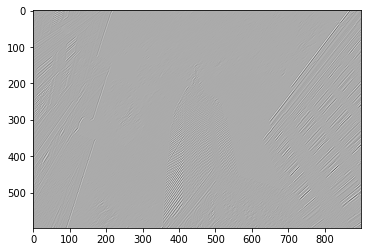

In [ ]:
# convolving image with even Gabor function
evenGaborConvolution1 = signal.convolve(nycimg,evenGaborMatrix, mode='same')
plt.imshow(evenGaborConvolution1, cmap=cm.Greys_r)

### Simple cells of visual cortex
Our previous examples used the example images to process the Gabor functions but the input of the primary visual cortex is from the LGN, so lets see what happens when we apply the Gabor functions to the "Mexican hat" outputs.


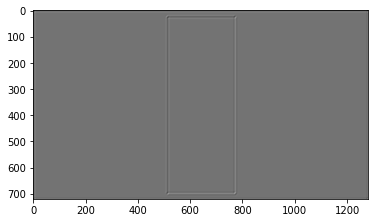

In [ ]:
# Simple cell using oddGabor
simpleCellVisualCortexConvolutionOdd = signal.convolve(mexicanHatProfileConvolution,oddGaborMatrix, mode='same')
plt.imshow(simpleCellVisualCortexConvolutionOdd, cmap=cm.Greys_r)

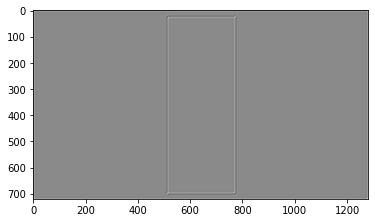

In [ ]:
# Simple cell using evenGabor
simpleCellVisualCortexConvolutionEven = signal.convolve(mexicanHatProfileConvolution,evenGaborMatrix, mode='same')
plt.imshow(simpleCellVisualCortexConvolutionEven, cmap=cm.Greys_r)

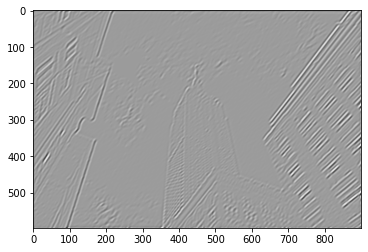

In [ ]:
# Simple cell using oddGabor
simpleCellVisualCortexConvolutionOdd1 = signal.convolve(mexicanHatProfileConvolution1,oddGaborMatrix, mode='same')
plt.imshow(simpleCellVisualCortexConvolutionOdd1, cmap=cm.Greys_r)

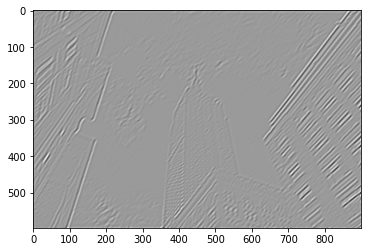

In [ ]:
# Simple cell using evenGabor
simpleCellVisualCortexConvolutionEven1 = signal.convolve(mexicanHatProfileConvolution1,evenGaborMatrix, mode='same')
plt.imshow(simpleCellVisualCortexConvolutionEven1, cmap=cm.Greys_r)

#### Observations

The bar image doesnt seem to be any different. the reason is the orientation of the Gabor is 45 degrees. 
But look at the city scape image. It looks like only those features that are orientation the same as the Gabor are clearer. The two Gabors also have a small shift in highlighting the dark edge and the light edge.

### Complex cells of visual cortex
<p><b> Complex cells</b> in the primary visual cortex, unlike the simple cells do not have distinct subregions but are selective to orientaion and edge. We model these cells are quadrature pair or simply the sum ofsquares of odd and even gabor filters.

In [ ]:
# plotting filter
def quad(x,y,sigma, orientation):
  q1 =oddGabor2D(x,y,sigma, orientation) #Receptive fields are bigger
  q2 =evenGabor2D(x,y,sigma, orientation)
  return ((q1**2)+(q2**2))

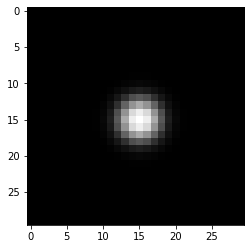

In [ ]:
# plotting combined Gabor function
GaborMatrix = filterMatrix(lambda x,y: quad(x,y,7,1))
plt.imshow(GaborMatrix, cmap=cm.Greys_r)

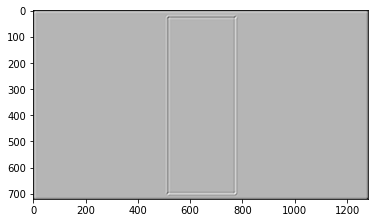

In [ ]:
# Complex cell using summed gabor matrix
complexCellVisualCortexConvolutionodd = signal.convolve(simpleCellVisualCortexConvolutionOdd,GaborMatrix, mode='same')
plt.imshow(complexCellVisualCortexConvolution, cmap=cm.Greys_r)

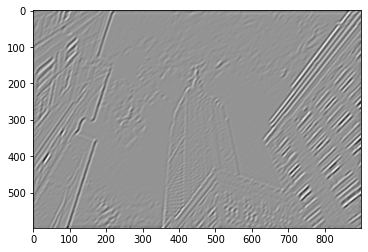

In [ ]:
 #Complex cell using summed gabor matrix
complexCellVisualCortexConvolutioneven = signal.convolve(simpleCellVisualCortexConvolutionOdd1,GaborMatrix, mode='same')
plt.imshow(complexCellVisualCortexConvolutioneven, cmap=cm.Greys_r)

###What did you notice in all the different hierarchial layers?

The response to signals is becoming more and more specific

<ul> - Simple Blur </ul>
<ul> - Mexican Hat: we identified is sensitive to changes in contrast (Light to dark or Dark to light) </ul>
<ul>- Simple cells in the visual cortex: Sensitive to light and Dark but also to orientation. </ul>
<ul> - Complex cells: More sensitive to Orientation and Edges </ul>

To put it simply, we have just demonstrated the increase in <b> feature selectivity </b> across the visual pathway

### Fun play: Can be done at your own time

<ul>Change the input images and see what happens at the different heirarchial levels </ul>
<ul>Change the sigma of the mexican hat to simulate opposite polarity</ul>
<ul>Change the orientation of the Gabor patches</ul>
<ul> What inputs do Complex cells receive? Is it heirarchial or can they receive direct inputs from LGN? Do they get odd Gabor or Even Gabor inputs from simple cells or both? If both are they balanced or can we weight this. Try this by changing the input </ul>
<ul>

## Color Vision

### Photoreceptors

Our eyes have two types of photoreceptos <b>Rods</b> and <b>Cones</b>. Rods operate in very low light and are thought not to be color sensitive. The day or light vision is moderated by the cone photoreceptors. There are three types of cone photoreceptors. Each sensitive for a specific bandwidth of the light spectrum and are called Long wavelength sensitive cone (or L-cone), Medium wavelength sensitive cone (M- cone) and Short wavelength sensitive cone (S-cone) 

This three types of cones are found in some primate species includigng humans. Most other animals (e.g. cats) have only two types of cones so lack color vision as we know it. Some animals like specific shark species have 5 types of cones including those for UV light range. The three cone types lead to us having <b>trichromatic</b> vision. Please note there is a compromise on number of receptors vs how fine we can see. In other words, we really cannot have a receptor for each color, Hence Nature has arrived at a compromise of having three different types to generate our whole gamut of color (More of less like your screens which have RGB LEDs, LCDS or phosphors to generate Million color display).

The image below show the distribution of these cones that has been viewed through an Adaptive Optics assisted Scanning Layer Opthalmoscope, a special microscope that can be used to view inside the living eye.

The second image shows the wavelength these cones are sensitive to. It is a plot of relative sensitivity vs the wavelength of light.

<p> This concept of the three cones contributing to our gamut of color perception is often called as the trichromatic theory of vision, originally proposed by Hermann von Helmholtz (1821-1894).




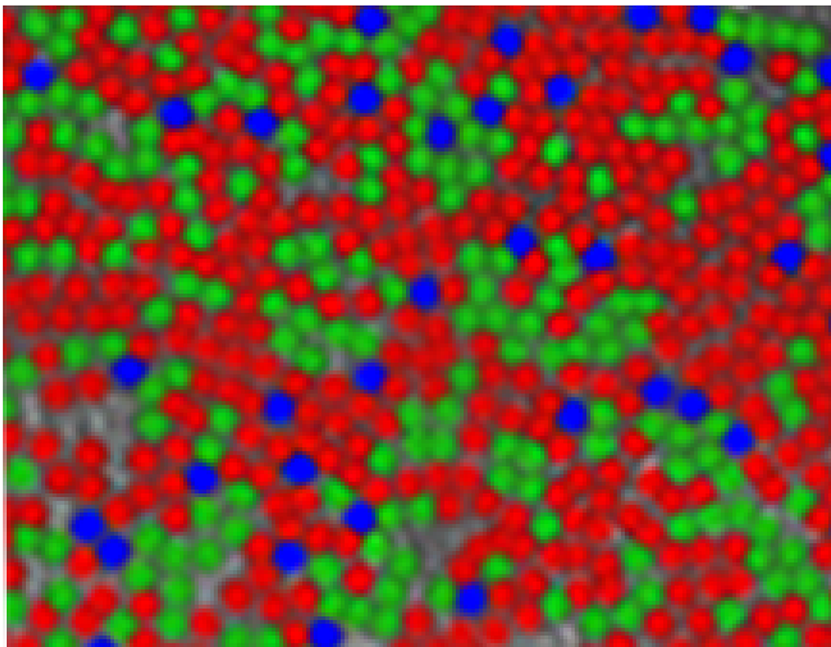

In [ ]:
urls=["https://raw.githubusercontent.com/jaikishanjayakumar/MachineIntelligenceandBrainResearch/Figures/pone.0144891.g003.png"];
for url in urls:
  image = io.imread(url);
  color_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2_imshow(color_img)
  

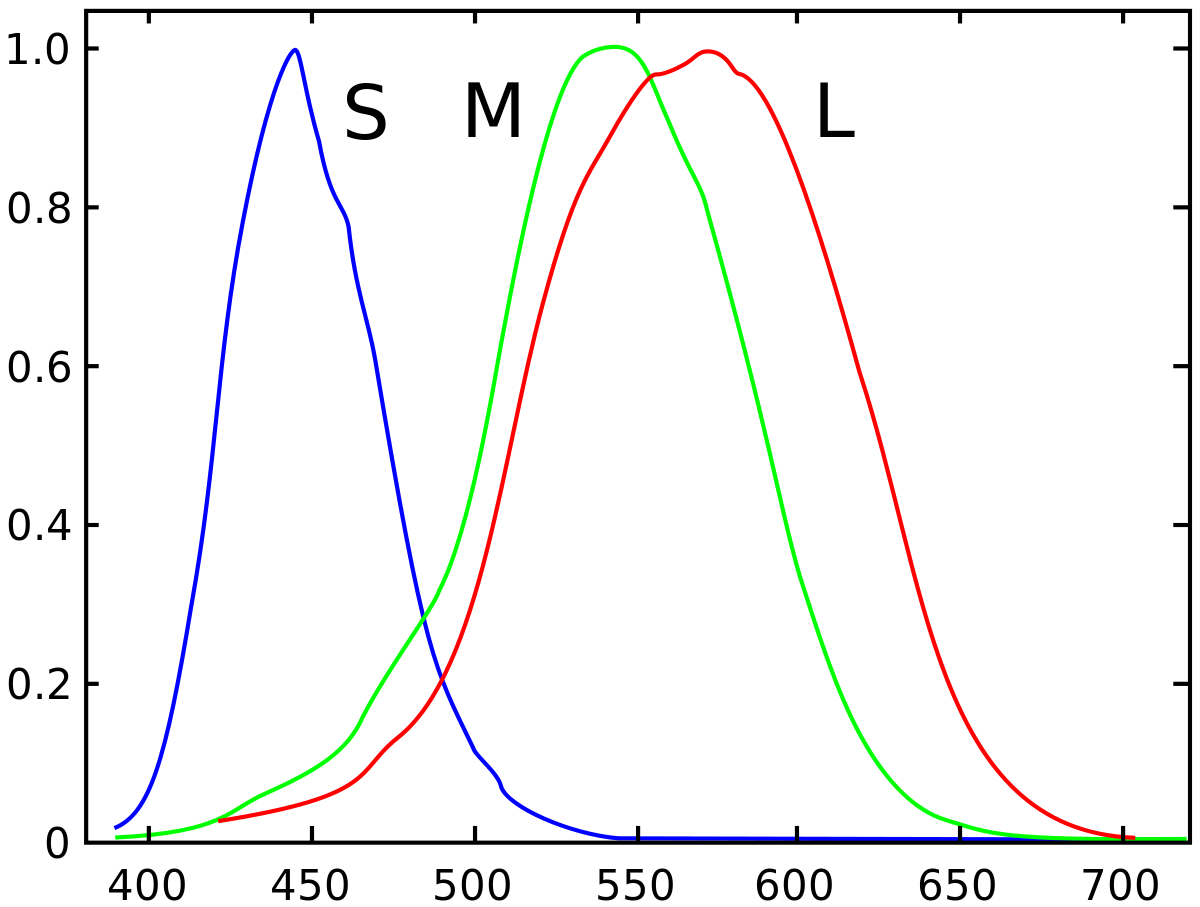

In [ ]:
urls=["https://raw.githubusercontent.com/jaikishanjayakumar/MachineIntelligenceandBrainResearch/Figures/1200px-Cones_SMJ2_E.svg.png"];
for url in urls:
  image = io.imread(url);
  color_img1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2_imshow(color_img1)


### Parallel channels of the chromatic visual signal

Helmholtz theory of trichromatic vision formed the subject of tremendous debate where Ewald Hering proposed that rather than cones forming basis of building the Gamut of colors, Signals are transmitted by opponency. Hering proposed that signals are grouped into parallel channels: R-G opponency, B-Y opponency and we have seen the thrid one Luminance ON- Luminance OFF in our previus sections of the mexican hat profile of the ganglion cells and LGN cells.
This was called the <b> Opponent theory of color </b>.

It turns out that both were indeed correct as photoreceptor are of three types and the ganglion cells carry the opponent signals.

[Here](https://github.com/jaikishanjayakumar/MachineIntelligenceandBrainResearch/blob/cb8b25e957ad56dfc2456be294f633a0329c15c5/lilacchaser_Lilac.gif) is a GIF demonstration (open in a new tab or window) of a series of pink blobs moving across a gray back groud. There is one Blank containing no signal. If you concentrate on the center cross you notice, that the blank is filled with an after effect that has the opponent profile. Green blob. This demonstration provides the evidence that there is indeed a Opponent channel for the Red-Green channel.

The [second image](https://github.com/jaikishanjayakumar/MachineIntelligenceandBrainResearch/blob/2c598a520e552521a3574614a32ddab4150949e5/lilacChaser_blue.gif) demonstrates the same illusion for a Blue blob on a gray background. (The opponent here is Yellow).

## Conclusions

We have introduced some of the computations that happen in the early visual pathway for a set of images and also introduced you to how the visual system tackles color.

Developed by Dr Jaikishan Jayakumar , Center for Computational Brain Research, Indian Institute of Technology Madras and Mr. Abhinav Balasubramaniam 

All rights reserved